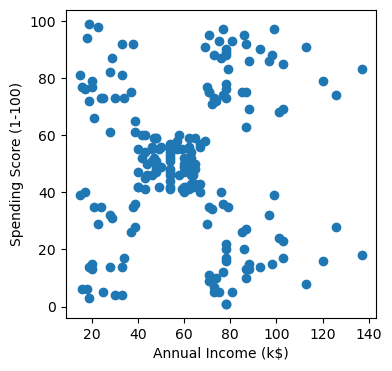

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroids: 
[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]
Label:


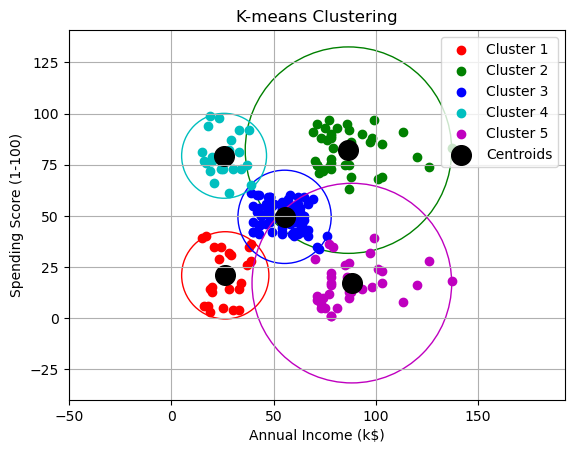

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
data = pd.read_csv("Mall_Customers.csv")
data
X = data[['Annual Income (k$)' , 'Spending Score (1-100)']]
X
plt.figure(figsize=(4,4))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel("Spending Score (1-100)")
plt.show()
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("Centroids: ")
print(centroids)
print("Label:")
# define colors for each cluster
colors = ['r', 'g', 'b', 'c', 'm']

# plotting the controls
for i in range(k):
  cluster_points = X[labels == i]
  plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], color=colors[i], label=f'Cluster {i+1}')

  #Find minimum enclosing circle
  distances = euclidean_distances(cluster_points, [centroids[i]])
  radius = np.max(distances)

  circle = plt.Circle(centroids[i], radius, color=colors[i], fill=False)
  plt.gca().add_patch(circle)

#Plotting the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='k', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.axis('equal') 
plt.show()